**V10**

In [1]:
!pip install pandas==1.4.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 64.0 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==1.5.3, but you have pandas 1.4.2 which is incompatible.


In [2]:
import pandas as pd

In [3]:
# Change the file directory to yours, the files are in a public folder in google drive:
# https://drive.google.com/drive/folders/1CsvJs0xZ9SCLtG4ci2dNGCkhqnI-1DLS?usp=drive_link
df_graph = pd.read_csv('/content/drive/MyDrive/2022/Orga_de_Datos/Datasets/business.csv', usecols=['categories', 'hours'])

In [4]:
df_graph.dropna(inplace=True)

df_graph = df_graph.convert_dtypes()
df_graph['categories'] = df_graph.apply(lambda row : row['categories'].split(", "), axis=1) #Convierto las categorias a listas
df_graph = df_graph.explode('categories') #Creo una fila por cada categoría distinta
df_graph = df_graph.convert_dtypes()

categories = {'Arts & Entertainment', 'Auto Repair', 'Bars', 'Beauty & Spas', 'Coffee & Tea', 'Home & Garden'}
df_graph = df_graph[df_graph['categories'].isin(categories)] #Me quedo con las categorías que me interesan

In [5]:
import json

def get_earliest_hours(hours):
  opening_hours = []
  for time in hours.values():
    start_time_in_hours = time.split("-")[0]
    start_time_in_hours = int(start_time_in_hours.split(":")[0]) + int(start_time_in_hours.split(":")[1])/60
    if start_time_in_hours:
      opening_hours.append(start_time_in_hours)
  return opening_hours

def convert_to_opening_list(row):
  return get_earliest_hours(json.loads(row['hours'].replace("'", '"')))

df_graph['hours'] = df_graph.apply(convert_to_opening_list, axis=1) #obtengo una lista de las horas de apretura

df_graph = df_graph.explode('hours') #Creo una fila por cada hora distinta
df_graph["hours"] = pd.to_numeric(df_graph["hours"])

In [8]:
!pip install matplotlib==3.5.2
!pip install seaborn==0.11.2

Text(0.5, 0, 'Hora')

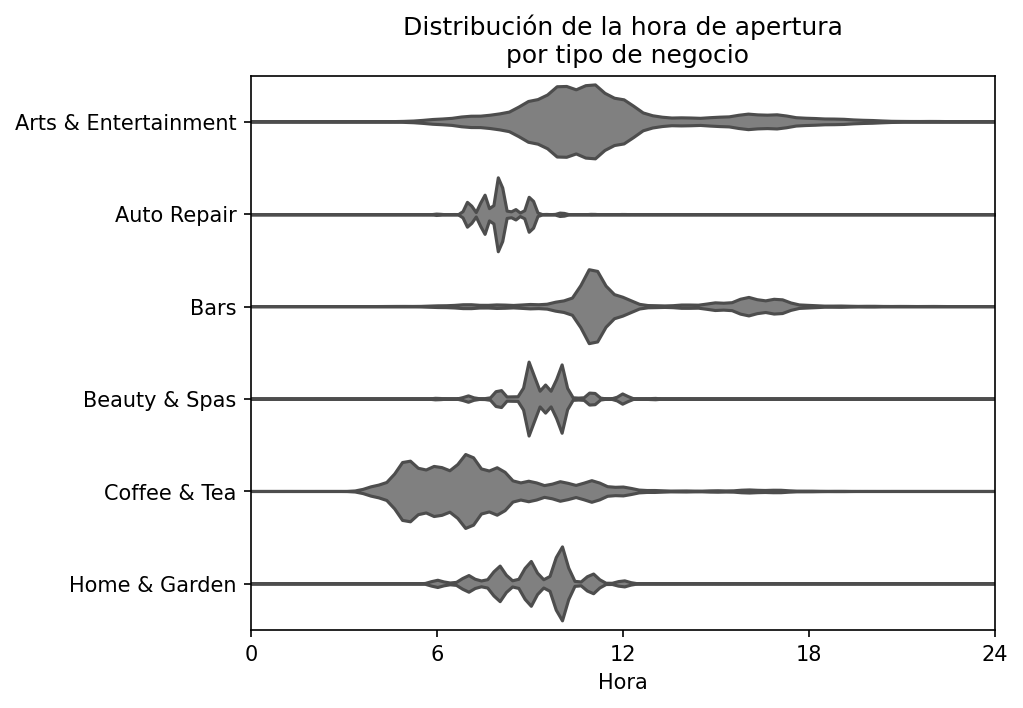

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(dpi=150)
plt.title("Distribución de la hora de apertura\n por tipo de negocio")
ax = sns.violinplot(data=df_graph, x='hours', y='categories', color='grey', gridsize=200, scale='width', cut = 48, inner=None, order=['Arts & Entertainment', 'Auto Repair', 'Bars', 'Beauty & Spas', 'Coffee & Tea', 'Home & Garden'])
ax.set_xlim(0, 24)
ax.set_xticks(range(0,25,6))
ax.set_ylabel("")
ax.set_xlabel("Hora")